## Logistic Regression Approach

1. Convert business problem to data science problem.
2. Load data.
3. Understand the data.
4. Data preprocessing.
5. Exploratory data analysis(EDA).
6. Model building.
7. Model diagnostics.
8. Predictions and Evaluations.

### 1. Problem Statement

Build a classification engine which classifies a customer if he/she has churned out of the bank or not, based on various features like credit score, balance, tenure, gender etc.

In [1]:
# import necessary modules
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### 2. Load Data

In [2]:
churn_data = pd.read_csv('data.csv', index_col='RowNumber')

### 3. Understanding the data

In [3]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
churn_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
num_cols = churn_data.select_dtypes(include=np.number).columns
cat_cols = churn_data.select_dtypes(exclude=np.number).columns

print(f"Numerical columns: {num_cols.values}\n")
print(f"Categorical columns: {cat_cols.values}\n")

Numerical columns: ['CustomerId' 'CreditScore' 'Age' 'Tenure' 'Balance' 'NumOfProducts'
 'HasCrCard' 'IsActiveMember' 'EstimatedSalary' 'Exited']

Categorical columns: ['Surname' 'Geography' 'Gender']



### 4. Data pre-processing

In [7]:
# let's drop few columns which won't contribute to the model using domain knowldedge.
churn_data.drop(['CustomerId', 'Surname'], axis=1, inplace=True)

In [8]:
# Let's do one hot encoding for the column `Geography` as Logistic Regression model only accepts numerical values
churn_data_new = pd.get_dummies(prefix='Geo', data=churn_data, columns=['Geography'])
churn_data_new.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,,
1,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
2,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
3,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
4,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
5,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [9]:
# For `Gender` column, we will do Label Encoding, 1: Male, 0: Female
churn_data_new['Gender'] = churn_data_new['Gender'].map({'Male':1, 'Female':0})

In [10]:
churn_data_new.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,,
1,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
2,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
3,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
4,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
5,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


### 5. Exploratory Data Analysis (EDA)

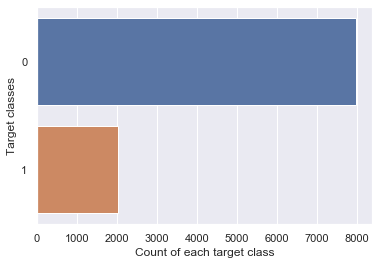

In [11]:
# Check the distribution of y variable to see if it's a case of unbalanced class
sns.countplot(y=churn_data_new.Exited, data=churn_data_new)
plt.xlabel("Count of each target class")
plt.ylabel("Target classes")
plt.show()

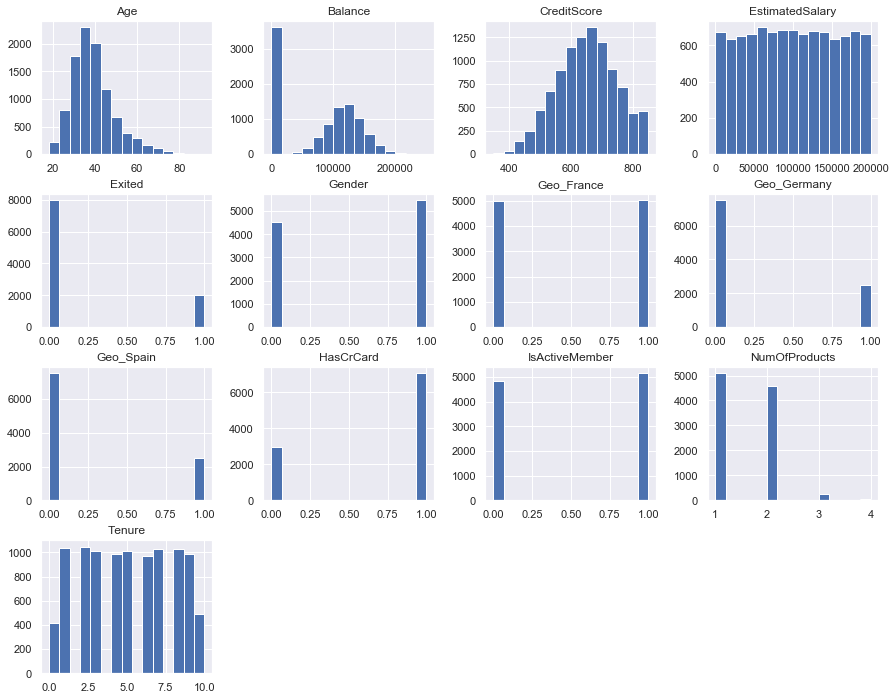

In [12]:
# Check the distribution of all features
churn_data_new.hist(figsize=(15, 12), bins=15)
plt.title("Features Distribution")
plt.show()

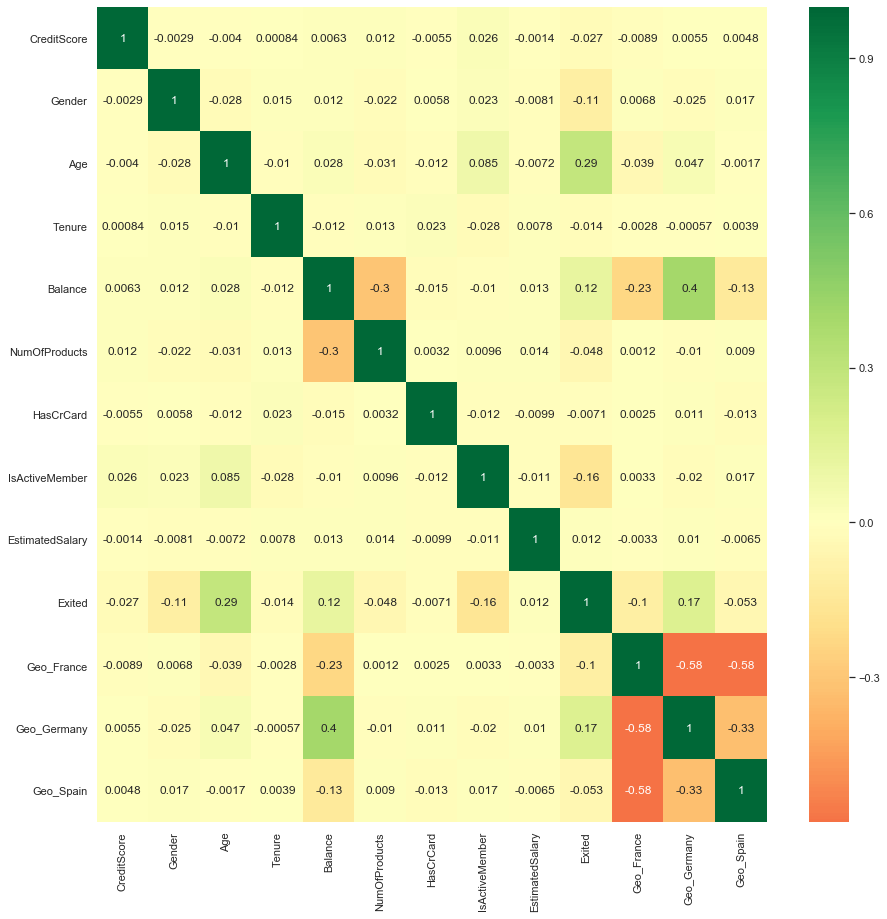

In [13]:
# Now we will check the multicollinearity of features 
plt.figure(figsize=(15, 15))
sns.heatmap(churn_data_new.corr(), annot=True, cmap='RdYlGn', center=0);

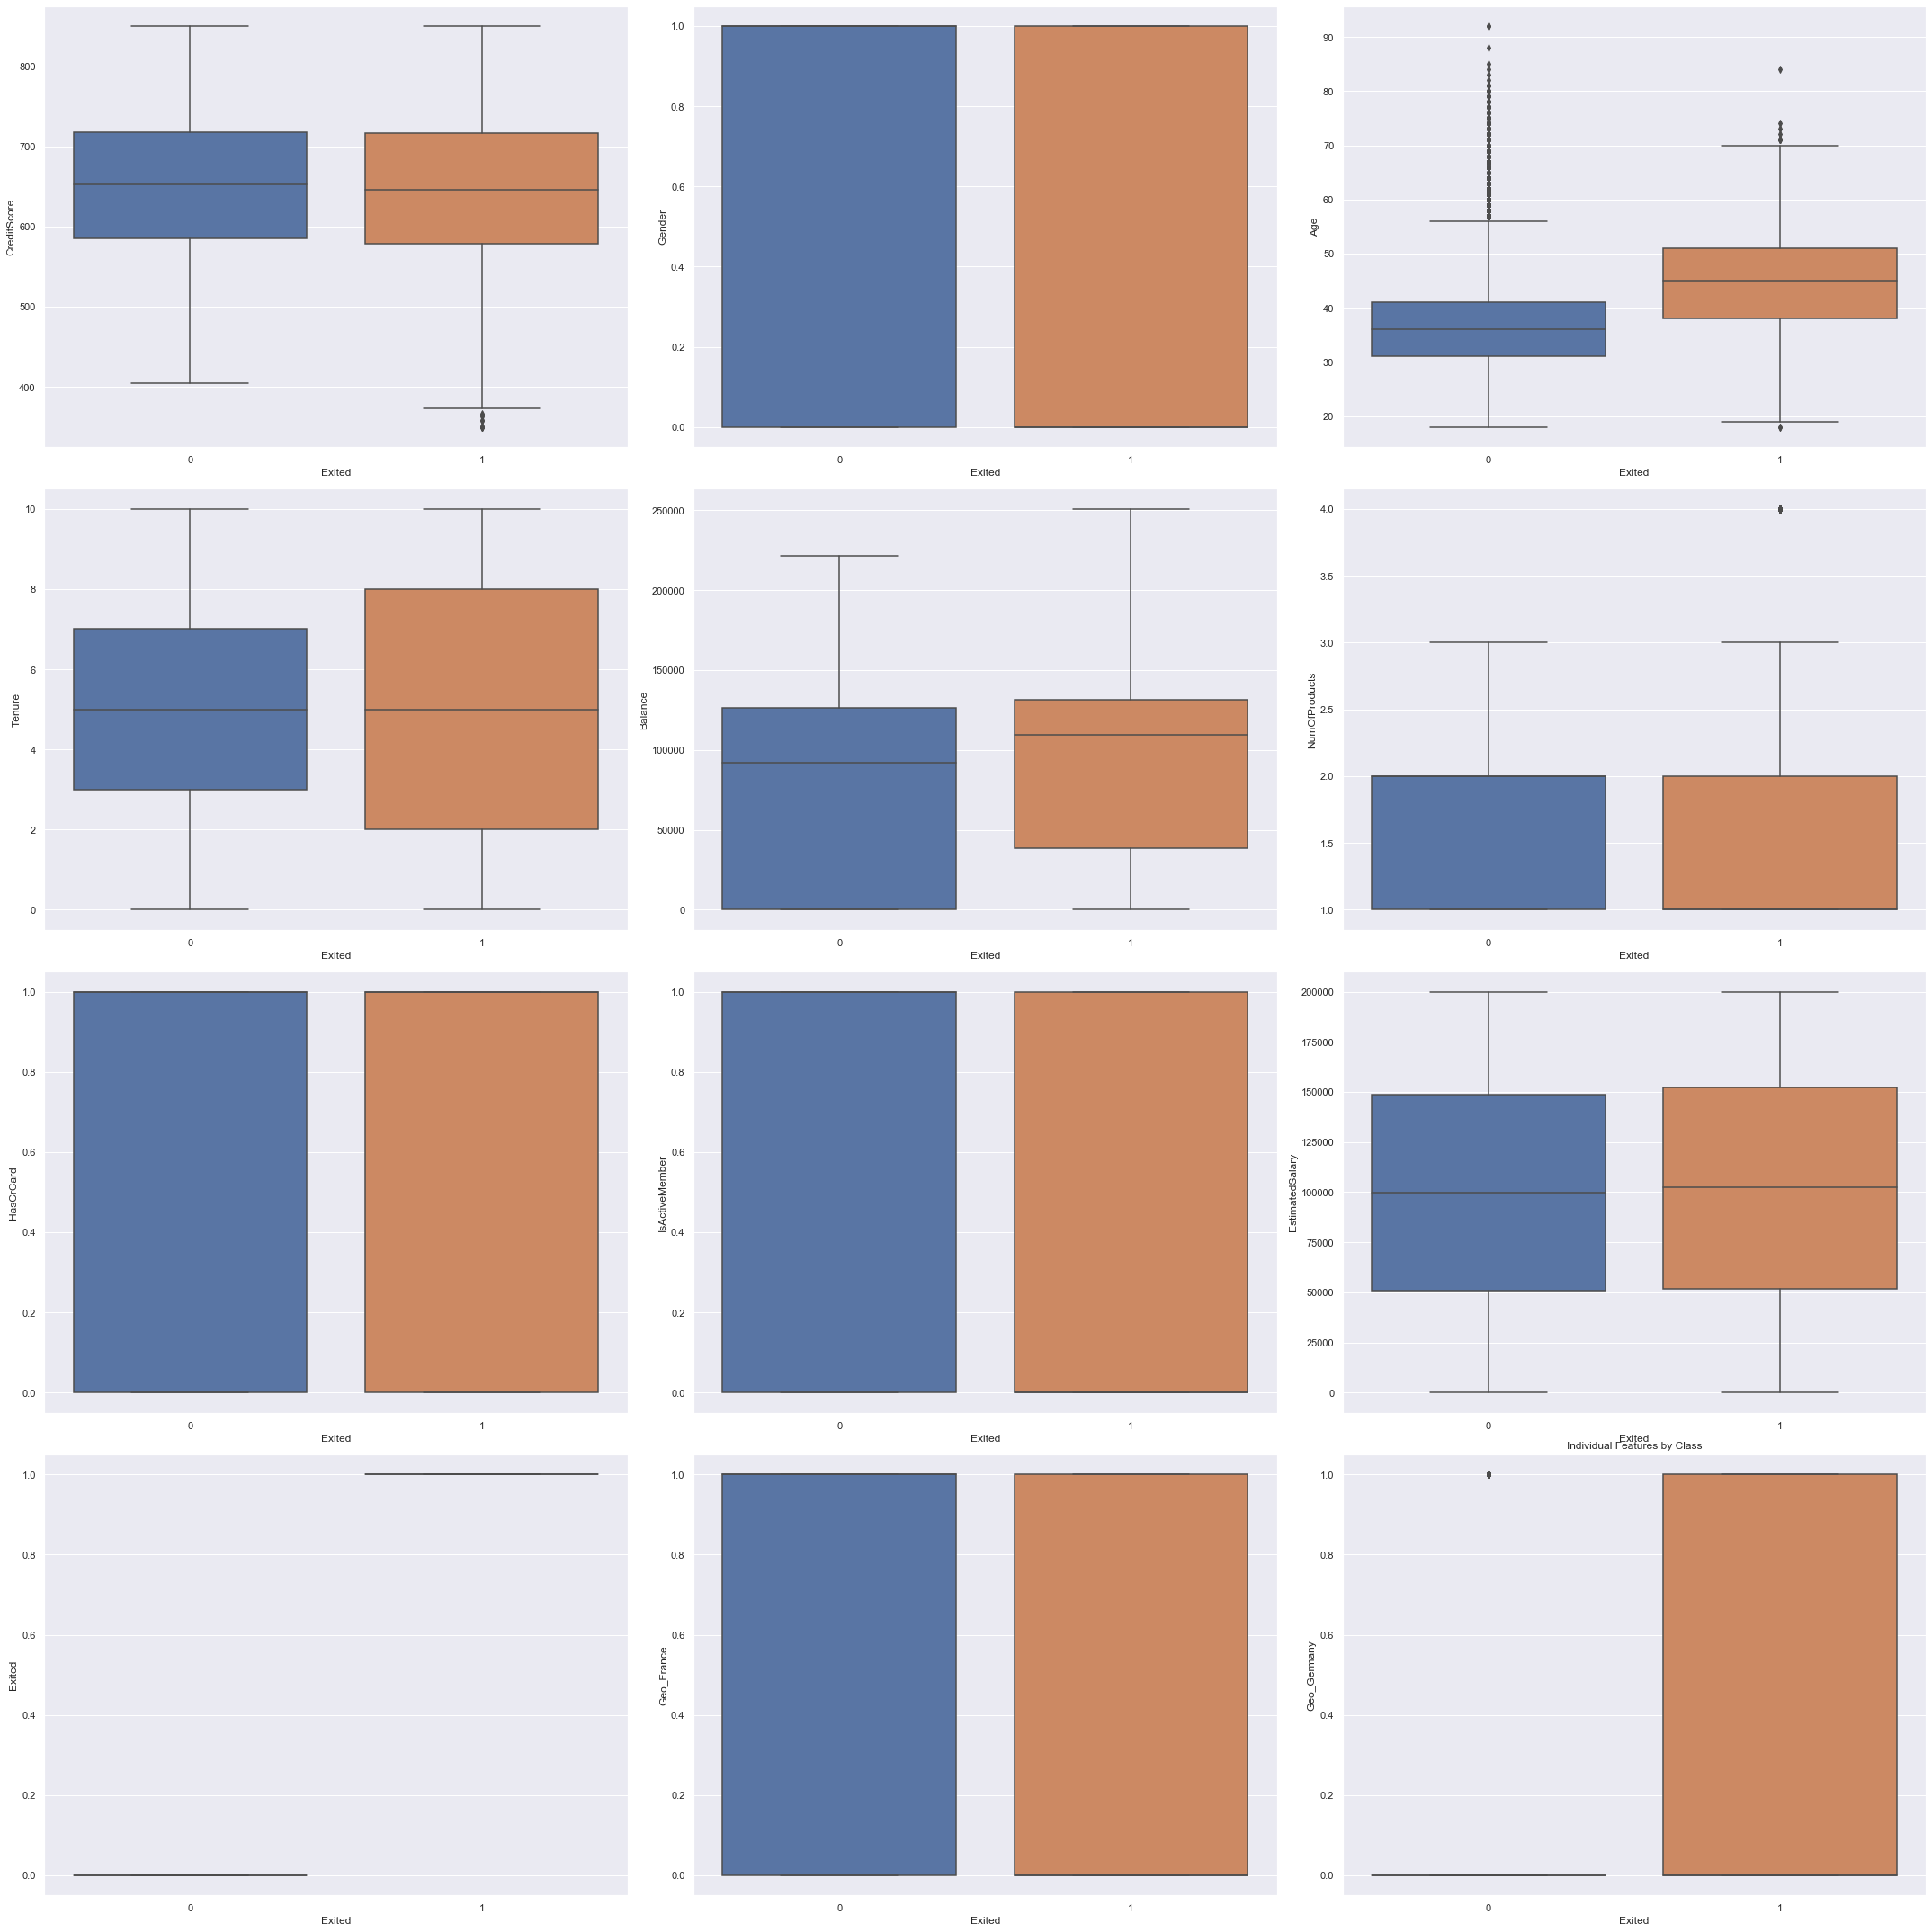

In [14]:
# Let's check the distribution of all features across y variable
fig, ax = plt.subplots(nrows = 4, ncols=3, figsize=(30,30))
row = 0
col = 0
for i in range(churn_data_new.shape[1]-1):
    if col > 2:
        row += 1
        col = 0
    axes = ax[row, col]
    sns.boxplot(x = churn_data_new['Exited'], y = churn_data_new[churn_data_new.columns[i]], ax = axes)
    col += 1
plt.tight_layout()
plt.title("Individual Features by Class")
plt.show()

### 6. Model building

In [15]:
# Select X and y variables
X = churn_data_new.drop(['Exited'], axis=1)
y = churn_data_new['Exited']

In [16]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [17]:
# Feature Scaling as we don't want one variable dominate the other and it makes computation easy
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
# Fitting the model
lr = LogisticRegression()

# Model Training
lr.fit(X_train, y_train);

### 7. Predictions and Evaluation

In [19]:
# Predict target values 
y_pred = lr.predict(X_test)

y_pred_prob = lr.predict_proba(X_test)[::,1]

y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

#### Accuracy

In [20]:
acc_score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc_score}")

Accuracy Score: 0.8075757575757576


#### Confusion Matrix

In [21]:
conf_mat = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix: \n {conf_mat}")

Confusion Matrix: 
 [[2511  106]
 [ 529  154]]


#### `Summary` : 

ROWS: Actuals, COLUMNS: Predicted

A confusion matrix C is such that C(i, j) is equal to the number of observations known to be in group i and predicted to be in group j.

Thus in binary classification, the count of true negatives is C(0, 0), false negatives is C(1, 0), true positives is C(1,1) and false positives is C(0, 1).

So, we have 
1. True Positive: 154
2. False Negative: 529
3. False Positive: 106
4. True Negative: 2511

We want to avoid False Negatives at all costs, because, it says the customer is with us when he/she has churned out.

#### Accuracy, Precision, Recall, F1 Score

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2617
           1       0.59      0.23      0.33       683

    accuracy                           0.81      3300
   macro avg       0.71      0.59      0.61      3300
weighted avg       0.78      0.81      0.77      3300



#### ROC Curve

In [23]:
y_pred_prob.ravel()

array([0.21782218, 0.3447732 , 0.14977356, ..., 0.23203656, 0.60486989,
       0.03131389])

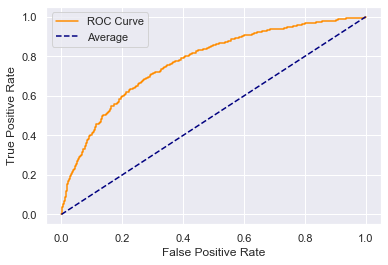

In [24]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

# Compute micro-average ROC curve and ROC area
y_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label="ROC Curve", color='darkorange')
plt.plot(ns_fpr, ns_tpr, label="Average", color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#### AUC (Area under the curve)

In [25]:
# calculate scores
ns_auc = roc_auc_score(y_test, y_probs)
lr_auc = roc_auc_score(y_test, y_pred_prob)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.770


### Handle Class Imbalance

In [27]:
from imblearn.over_sampling import RandomOverSampler

X = churn_data_new.drop(['Exited'], axis=1)
y = churn_data_new['Exited']

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

y_ros.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [28]:
def classification_model(X,y,class_weight = None):
    
    # Splitting the dataset into the Training set and Test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
    
    # Feature Scaling because yes we don't want one independent variable dominating the other and it makes computations easy
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    # Defining the model
    lr = LogisticRegression(class_weight = class_weight)

    # Training the model:
    lr.fit(X_train, y_train)

    # Predicting target values by using x_test and our model:
    y_pred0 = lr.predict(X_test)
    lr_probs = lr.predict_proba(X_test)
    
    results = confusion_matrix(y_test, y_pred0) 


    print ('Confusion Matrix :')
    print(results) 
    print ('Accuracy Score :',accuracy_score(y_test, y_pred0) )
    print ('Report : ')
    print (classification_report(y_test, y_pred0))
    
def performance_metric(actual,predicted):
    
    results = confusion_matrix(actual, predicted) 


    print ('Confusion Matrix :')
    print(results) 
    print ('Accuracy Score :',accuracy_score(actual, predicted) )
    print ('Report : ')
    print (classification_report(actual, predicted))

In [29]:
classification_model(X_ros, y_ros)

Confusion Matrix :
[[1871  753]
 [ 773 1859]]
Accuracy Score : 0.7096651445966514
Report : 
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      2624
           1       0.71      0.71      0.71      2632

    accuracy                           0.71      5256
   macro avg       0.71      0.71      0.71      5256
weighted avg       0.71      0.71      0.71      5256

